In [ ]:
# creating R environment in Google Colab
%load_ext rpy2.ipython

In [ ]:
%%R
# installing necessary libraries
install.packages('tidyverse')
library(tidyverse)
install.packages('caret')
library(caret)
install.packages('corrplot')
library(corrplot)
install.packages('xgboost')
library(xgboost)

In [ ]:
%%R
# reading the file
data =  read.csv('wine.csv')

### Basic Data Summary

In [ ]:
%%R
# head of dataset
head(data)

  fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1           7.5             0.33        0.32           11.1     0.036
2           6.3             0.27        0.29           12.2     0.044
3           7.0             0.30        0.51           13.6     0.050
4           7.4             0.38        0.27            7.5     0.041
5           8.1             0.12        0.38            0.9     0.034
6           6.6             0.20        0.38            7.9     0.052
  free_sulfur_dioxide total_sulfur_dioxide density   pH sulphates alcohol
1                  25                  119 0.99620 3.15      0.34    10.5
2                  59                  196 0.99782 3.14      0.40     8.8
3                  40                  168 0.99760 3.07      0.52     9.6
4                  24                  160 0.99535 3.17      0.43      10
5                  36                   86 0.99026 2.80      0.55      12
6                  30                  145 0.99470 3.32      0.56 

In [ ]:
%%R
# structure of dataset
str(data)

'data.frame':	2037 obs. of  12 variables:
 $ fixed_acidity       : num  7.5 6.3 7 7.4 8.1 6.6 7.3 6.9 8.5 7.2 ...
 $ volatile_acidity    : num  0.33 0.27 0.3 0.38 0.12 0.2 0.26 0.32 0.18 0.27 ...
 $ citric_acid         : num  0.32 0.29 0.51 0.27 0.38 0.38 0.36 0.17 0.3 0.28 ...
 $ residual_sugar      : num  11.1 12.2 13.6 7.5 0.9 7.9 5.2 7.6 1.1 15.2 ...
 $ chlorides           : num  0.036 0.044 0.05 0.041 0.034 0.052 0.04 0.042 0.028 0.046 ...
 $ free_sulfur_dioxide : num  25 59 40 24 36 30 31 69 34 6 ...
 $ total_sulfur_dioxide: num  119 196 168 160 86 145 141 219 95 41 ...
 $ density             : num  0.996 0.998 0.998 0.995 0.99 ...
 $ pH                  : num  3.15 3.14 3.07 3.17 2.8 3.32 3.16 3.13 2.83 3.17 ...
 $ sulphates           : num  0.34 0.4 0.52 0.43 0.55 0.56 0.59 0.4 0.36 0.39 ...
 $ alcohol             : chr  "10.5" "8.8" "9.6" "10" ...
 $ quality             : int  6 6 7 5 6 7 6 5 4 6 ...


In [ ]:
%%R
# converting alcohol column to double
data = transform(data, alcohol = as.numeric(alcohol))

In [ ]:
%%R
# summary of data
summary(data)

 fixed_acidity   volatile_acidity  citric_acid     residual_sugar  
 Min.   :4.400   Min.   :0.0800   Min.   :0.0000   Min.   : 0.700  
 1st Qu.:6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median :6.800   Median :0.2600   Median :0.3100   Median : 5.300  
 Mean   :6.826   Mean   :0.2666   Mean   :0.3232   Mean   : 6.278  
 3rd Qu.:7.300   3rd Qu.:0.3100   3rd Qu.:0.3800   3rd Qu.: 9.400  
 Max.   :8.800   Max.   :0.4850   Max.   :0.5700   Max.   :20.800  
                                                                   
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density        
 Min.   :0.01200   Min.   : 3.00       Min.   : 21.0        Min.   :  0.9871  
 1st Qu.:0.03500   1st Qu.:24.00       1st Qu.:107.0        1st Qu.:  0.9915  
 Median :0.04200   Median :34.00       Median :133.0        Median :  0.9935  
 Mean   :0.04221   Mean   :34.72       Mean   :136.9        Mean   :  1.5862  
 3rd Qu.:0.04900   3rd Qu.:45.00       3rd Qu.:166.0        3

In [ ]:
%%R
# filling missing values in column alcohol with mean
data$alcohol[is.na(data$alcohol)] = mean(data$alcohol, na.rm = TRUE)

### Data Visualization

#### Boxplots for different feature variables across different categories of Quality

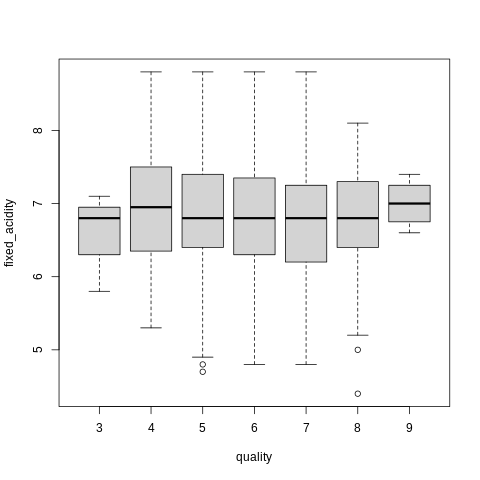

In [ ]:
%%R
# boxplot fixed_acidity vs quality
boxplot(fixed_acidity~quality, data=data)

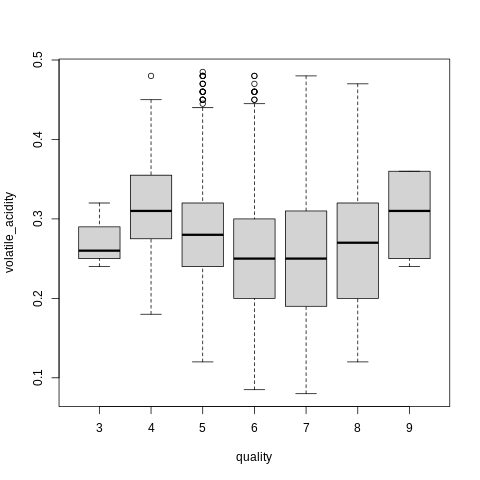

In [ ]:
%%R
# boxplot volatile_acidity vs quality
boxplot(volatile_acidity~quality, data=data)

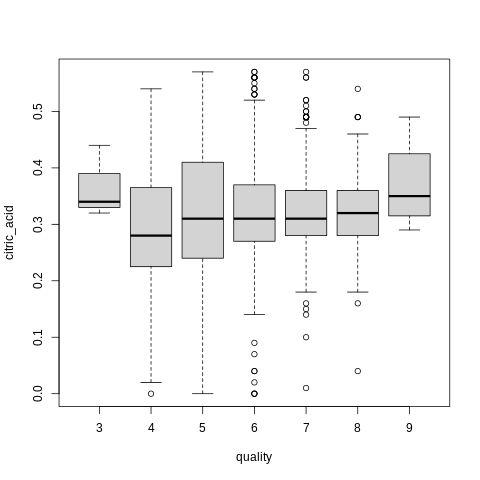

In [ ]:
%%R
# boxplot citric_acid vs quality
boxplot(citric_acid~quality, data=data)

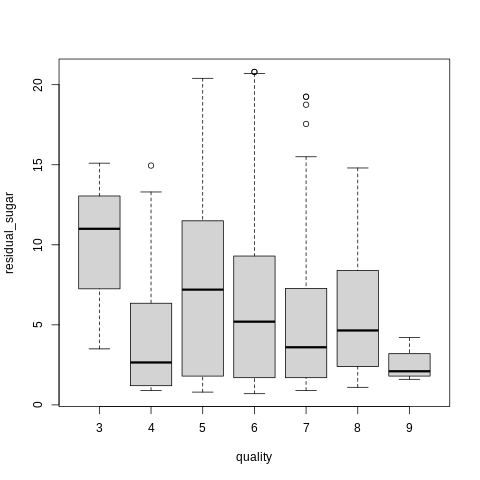

In [ ]:
%%R
# boxplot residual_sugar vs quality
boxplot(residual_sugar~quality, data=data)

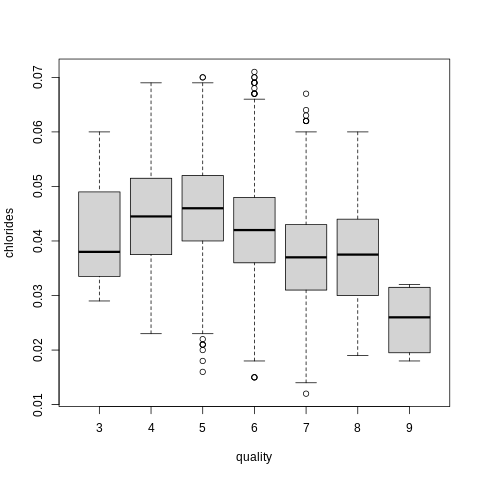

In [ ]:
%%R
# boxplot chlorides vs quality
boxplot(chlorides~quality, data=data)

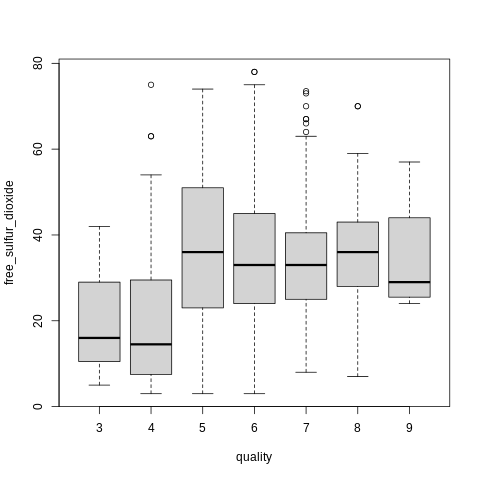

In [ ]:
%%R
# boxplot free_sulfur_dioxide vs quality
boxplot(free_sulfur_dioxide~quality, data=data)

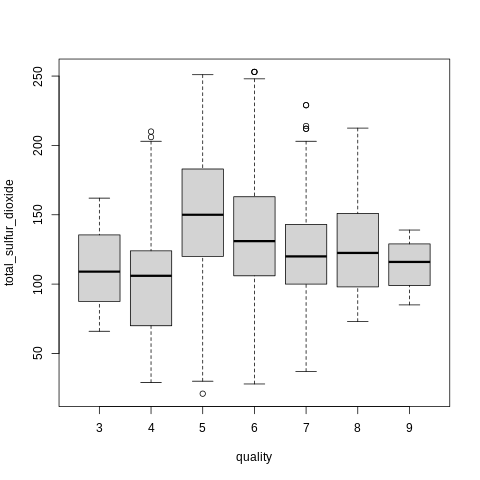

In [ ]:
%%R
# boxplot total_sulfur_dioxide vs quality
boxplot(total_sulfur_dioxide~quality, data=data)

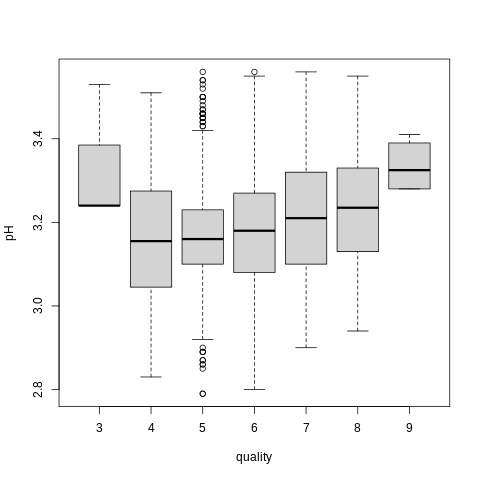

In [ ]:
%%R
# boxplot pH vs quality
boxplot(pH~quality, data=data)

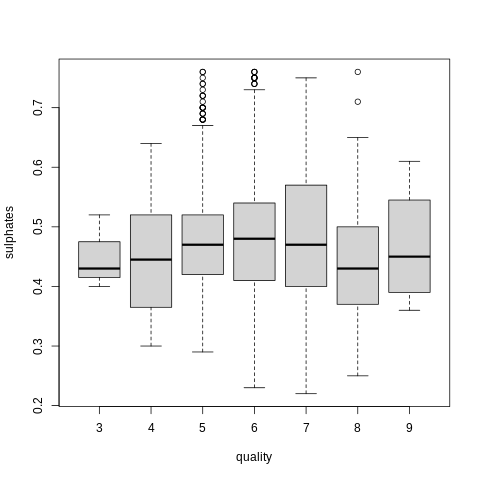

In [ ]:
%%R
# boxplot sulphates vs quality
boxplot(sulphates~quality, data=data)

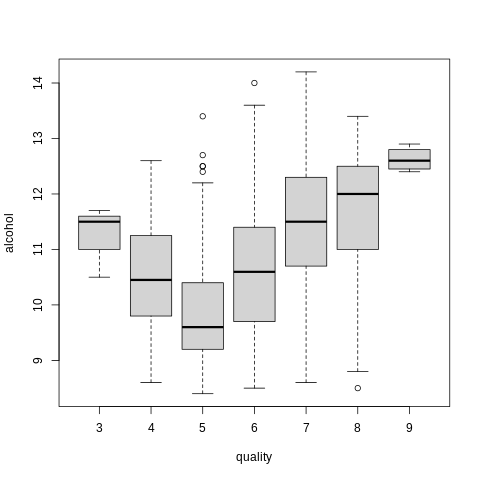

In [ ]:
%%R
# boxplot alcohol vs quality
boxplot(alcohol~quality, data=data)

#### Scatterplots for different feature variables.

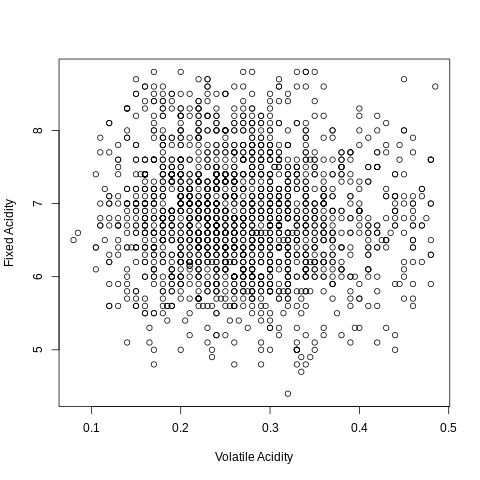

In [ ]:
%%R
# scatterplot volatile_acidity vs fixed_acidity
plot(x=data$volatile_acidity, y=data$fixed_acidity, xlab='Volatile Acidity', ylab='Fixed Acidity')

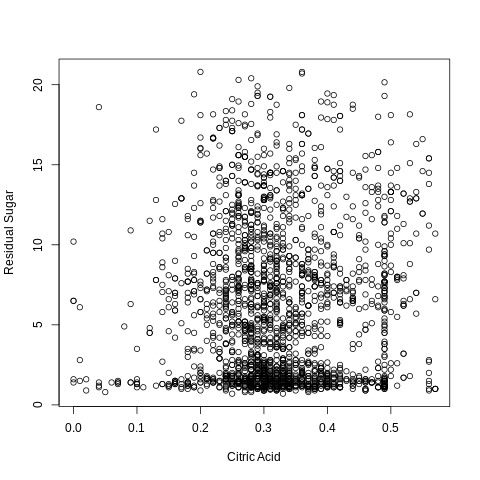

In [ ]:
%%R
# scatterplot citric_acid vs residual_sugar
plot(x=data$citric_acid, y=data$residual_sugar, xlab='Citric Acid', ylab='Residual Sugar')

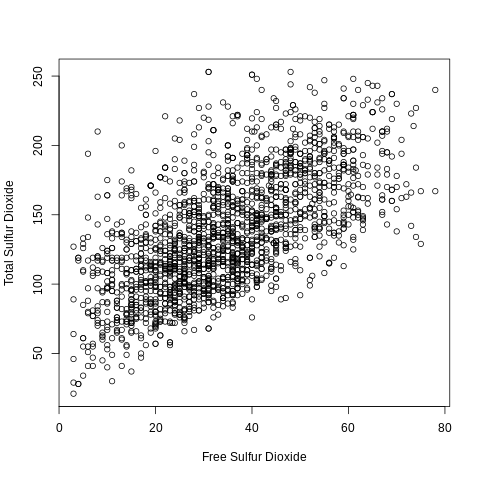

In [ ]:
%%R
# scatterplot free_sulfur_dioxide vs fixed_total_sulfur_dioxide
plot(x=data$free_sulfur_dioxide, y=data$total_sulfur_dioxide, xlab='Free Sulfur Dioxide', ylab='Total Sulfur Dioxide')

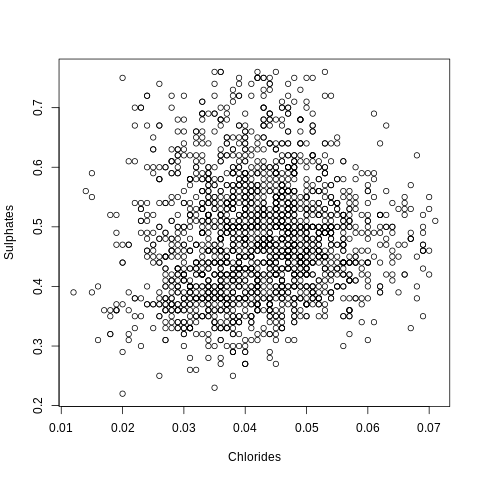

In [ ]:
%%R
# scatterplot chlorides vs sulphates
plot(x=data$chlorides, y=data$sulphates, xlab='Chlorides', ylab='Sulphates')

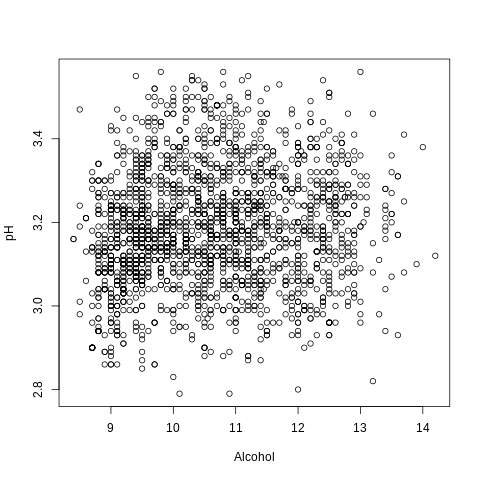

In [ ]:
%%R
# scatterplot alcohol vs fixed pH
plot(x=data$alcohol, y=data$pH, xlab='Alcohol', ylab='pH')

Correlation across different features

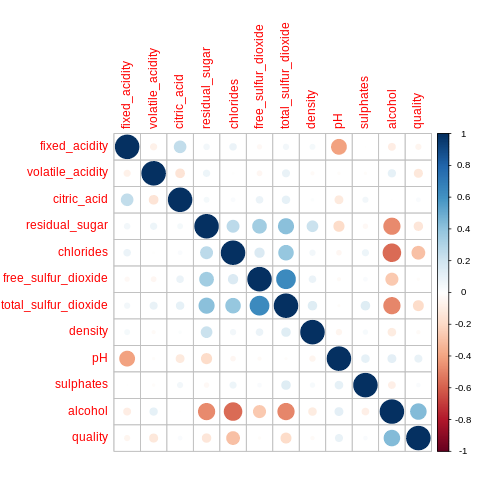

In [ ]:
%%R
# correlation heatmap
corrplot(cor(data))

### Data Cleaning and Processing

#### Mapping values of quality

In [ ]:
%%R
# turning categorical into numerical column

quality_map_function = function(q){
    
    if ((q == 3) || (q == 4)){
      return (0)
    }
    else if ((q == 5) || (q == 6) || (q == 7)){
        return (1)
    }
    else if ((q == 8) || (q == 9)){
        return (2)
    }
     
}

quality_map = unlist(lapply(data$quality, quality_map_function))
data = cbind(data, quality_map)
data = data[,-12]

### Data Split and Scale

In [ ]:
%%R
# splitting the dataset
train_index = sample(1:nrow(data), nrow(data)*0.75)

In [ ]:
%%R
# splitting the dataset into dependent and independent sets
data_variables = as.matrix(data[,-12])
data_label = data[,12]
data_matrix = xgb.DMatrix(data = as.matrix(data), label = data_label)

In [ ]:
%%R
# splitting dataset into training and testing sets
train_data   = data_variables[train_index,]
train_data = scale(train_data)
train_label  = data_label[train_index]
train_matrix = xgb.DMatrix(data = train_data, label = train_label)

test_data  = data_variables[-train_index,]
test_data = scale(test_data)
test_label = data_label[-train_index]
test_matrix = xgb.DMatrix(data = test_data, label = test_label)

### Model Building

In [ ]:
%%R
# building model with 5-fold cross validation

xgb_params = list("objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = 3)

cv_model = xgb.cv(params = xgb_params,
                   data = train_matrix, 
                   verbose = FALSE,
                   nfold = 5,
                   nrounds = 50,
                   prediction = TRUE)

In [ ]:
%%R
# predictions from model on training set
prediction <- data.frame(cv_model$pred) %>%
  mutate(max_prob = max.col(., ties.method = "last"),
         label = train_label + 1)
head(prediction)

            X1        X2           X3 max_prob label
1 1.676581e-04 0.9995489 2.835034e-04        2     2
2 7.203787e-05 0.9998721 5.580033e-05        2     2
3 2.092628e-04 0.9963638 3.426909e-03        2     2
4 6.281925e-01 0.3642557 7.551737e-03        1     2
5 3.359031e-02 0.9656068 8.028070e-04        2     2
6 6.567496e-04 0.9974639 1.879302e-03        2     2


In [ ]:
%%R
# confusion matrix of train set
confusionMatrix(factor(prediction$max_prob),
                factor(prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3
         1    2   10    0
         2   32 1436   42
         3    0    1    4

Overall Statistics
                                          
               Accuracy : 0.9443          
                 95% CI : (0.9316, 0.9553)
    No Information Rate : 0.9476          
    P-Value [Acc > NIR] : 0.7396          
                                          
                  Kappa : 0.1117          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity          0.058824   0.9924 0.086957
Specificity          0.993302   0.0750 0.999325
Pos Pred Value       0.166667   0.9510 0.800000
Neg Pred Value       0.978878   0.3529 0.972405
Precision            0.166667   0.9510 0.800000
Recall               0.058824   0.9924 0.086957
F1                   0.086957   0.9713 0.156863
Prevalence           0.022266

### Model Testing

In [ ]:
%%R
# training the model
bst_model = xgb.train(params = xgb_params,
                       data = train_matrix,
                       nrounds = nround)

# Predict hold-out test set
test_pred = predict(bst_model, newdata = test_matrix)
test_prediction <- matrix(test_pred, nrow = numberOfClasses,
                          ncol=length(test_pred)/numberOfClasses) %>%
  t() %>%
  data.frame() %>%
  mutate(label = test_label + 1,
         max_prob = max.col(., "last"))
  
  
# confusion matrix of test set
confusionMatrix(factor(test_prediction$max_prob),
                factor(test_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   0   1   0
         2   9 475  21
         3   0   1   3

Overall Statistics
                                          
               Accuracy : 0.9373          
                 95% CI : (0.9126, 0.9567)
    No Information Rate : 0.9353          
    P-Value [Acc > NIR] : 0.4745          
                                          
                  Kappa : 0.146           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity          0.000000  0.99581 0.125000
Specificity          0.998004  0.09091 0.997942
Pos Pred Value       0.000000  0.94059 0.750000
Neg Pred Value       0.982318  0.60000 0.958498
Precision            0.000000  0.94059 0.750000
Recall               0.000000  0.99581 0.125000
F1                        NaN  0.96741 0.214286
Prevalence           0.017647  0.93529 0.

## Final Accuracy: 93.73%